In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
Data=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [ ]:
X = Data['Lemma']
y = Data['Manual Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.ravel())
X_val_vec = vectorizer.transform(X_val.ravel())

In [ ]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(X_train)
#X_train_seq = tokenizer.texts_to_sequences(X_train)
#X_val_seq = tokenizer.texts_to_sequences(X_val)
#maxlen = max([len(x) for x in X_train_seq])
#X_train_seq = pad_sequences(X_train_seq, maxlen=maxlen)
#X_val_seq = pad_sequences(X_val_seq, maxlen=maxlen)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [ ]:
rf = RandomForestClassifier(max_depth= 5, min_samples_split= 2,
                            n_estimators=100, random_state=42,class_weight='balanced')
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42,class_weight='balanced')
gb = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 100)

In [ ]:
#from tensorflow.keras.layers import Embedding, LSTM, Dense
#seq = Sequential()
#seq.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=maxlen))
#seq.add(LSTM(64))
#seq.add(Dense(1, activation='sigmoid'))
#seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from sklearn.ensemble import  VotingClassifier
ensemble = VotingClassifier([('rf', rf), ('svm', svm),('gb', gb)], voting='hard')
ensemble.fit(X_train_vec, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, class_weight='balanced',
                                  random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.01))])

In [ ]:
from sklearn.metrics import classification_report
ensemble_preds = ensemble.predict(X_val_vec)
print(classification_report(y_val, ensemble_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.89      1.00      0.94       481

    accuracy                           0.89       542
   macro avg       0.44      0.50      0.47       542
weighted avg       0.79      0.89      0.83       542



In [ ]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [ ]:
X_test = Data2['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = ensemble.predict(X_test_transformed)

In [ ]:
y_true=Data2['clusters']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.02      0.04       880
           1       0.87      1.00      0.93      5765

    accuracy                           0.87      6645
   macro avg       0.73      0.51      0.48      6645
weighted avg       0.83      0.87      0.81      6645



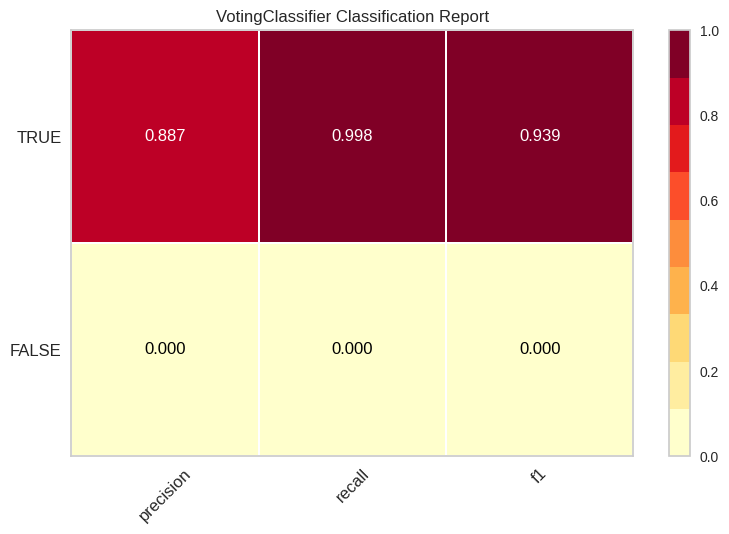

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ensemble, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_vec, y_train)
visualizer.score(X_val_vec, y_val)
visualizer.show()

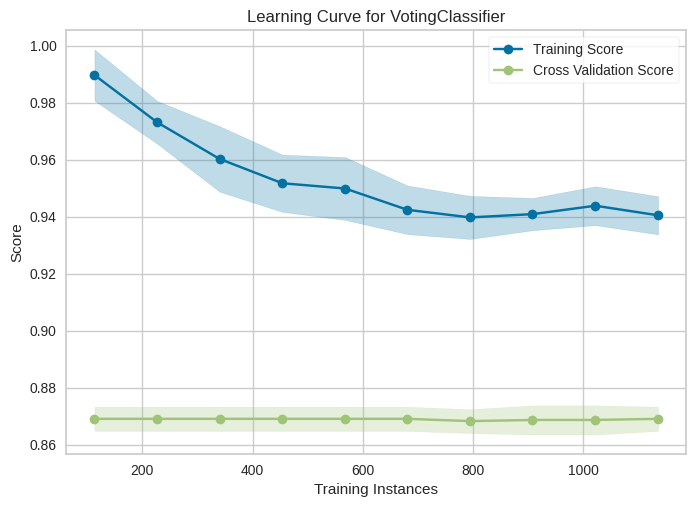

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    ensemble, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_vec, y_train)
lc_viz.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


rf_params = {'n_estimators': [100, 200, 300,400,500,600,700],
             'max_depth': [None, 5, 10,15,20,25,30],
             'min_samples_split': [2, 5, 10,15,20,25,30]}

svm_params = {'C': [1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

gb_params = {'n_estimators': [100, 200, 300,400,500,600,700],
             'learning_rate': [0.01, 0.1, 1],
             'max_depth': [3, 5, 10]}

In [ ]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5)

In [ ]:
rf_grid.fit(X_train_vec, y_train)
svm_grid.fit(X_train_vec, y_train)
gb_grid.fit(X_train_vec, y_train)

KeyboardInterrupt: ignored

In [ ]:
print("Random forest best params:", rf_grid.best_params_)
print("SVM best params:", svm_grid.best_params_)
print("Gradient boosting best params:", gb_grid.best_params_)

Random forest best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
SVM best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Gradient boosting best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
#rf.fit(X_train, y_train)
#svm.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [ ]:
#X_train2 = [str(x) for x in X_train]
#X_val2 = [str(x) for x in X_val]

In [ ]:
#from keras.preprocessing.text import Tokenizer
#from keras.utils import pad_sequences
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(X_train2)
#X_train_seq = tokenizer.texts_to_sequences(X_train2)
#X_val_seq = tokenizer.texts_to_sequences(X_val2)

In [ ]:
#max_length = max([len(seq) for seq in X_train_seq])
#X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
#X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

In [ ]:
#model = Sequential()
#model.add(Dense(10, input_dim=max_length, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

#model.fit(X_train_pad, y_train, epochs=10, batch_size=32)

In [ ]:
#rf_preds = rf.predict(X_val)
#svm_preds = svm.predict(X_val)


In [ ]:
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#ensemble = VotingClassifier([('rf', rf), ('svm', svm), ('seq', seq)], voting='hard')
#ensemble.fit(X_train_vect, y_train)


In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_val, ensemble_preds))